# Sales Data Analysis with Python

This project analyzes sales transactions using **Python, Pandas, and Matplotlib**.
The goal is to calculate key performance indicators (KPIs), explore trends, and
visualize business insights such as revenue by product, region, and customer.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
print('✅ Imports ready')

✅ Imports ready


In [3]:
# Check what files exist in the data folder
data_dir = '../data'
print('Current working dir:', os.getcwd())
print('Looking for data in:', os.path.abspath(data_dir))
print('Files found:', os.listdir(data_dir))

Current working dir: /Users/lakendrabaines/Downloads/python-sales-analytics-portfolio/notebooks
Looking for data in: /Users/lakendrabaines/Downloads/python-sales-analytics-portfolio/data
Files found: ['sales_data.csv']


In [5]:
# Load the dataset (CSV preferred)
csv_path = '../data/sales_data.csv'
xlsx_path = '../data/sales_data.xlsx'

if os.path.exists(csv_path):
    # Try common encodings to avoid Unicode issues
    try:
        df = pd.read_csv(csv_path)
    except UnicodeDecodeError:
        df = pd.read_csv(csv_path, encoding='latin1')
    source = csv_path
elif os.path.exists(xlsx_path):
    df = pd.read_excel(xlsx_path)
    source = xlsx_path
else:
    raise FileNotFoundError('Could not find sales_data.csv or sales_data.xlsx in ../data/')

print('✅ Loaded:', source)
df.head()

✅ Loaded: ../data/sales_data.csv


,OrderID,OrderDate,CustomerName,Region,Product,Category,UnitPrice,Quantity
0,1001,2024-01-05,John Smith,West,Laptop,Electronics,1200,1
1,1002,2024-01-07,Sarah Davis,East,Desk,Furniture,350,1
2,1003,2024-01-08,Michael Lee,South,Monitor,Electronics,220,2
3,1004,2024-01-11,Emma Johnson,West,Office Chair,Furniture,180,1
4,1005,2024-01-12,Daniel Kim,North,Keyboard,Accessories,40,2


In [7]:
print('Shape:', df.shape)
display(df.head(10))
display(df.tail(5))

Shape: (10, 8)


,OrderID,OrderDate,CustomerName,Region,Product,Category,UnitPrice,Quantity
0,1001,2024-01-05,John Smith,West,Laptop,Electronics,1200,1
1,1002,2024-01-07,Sarah Davis,East,Desk,Furniture,350,1
2,1003,2024-01-08,Michael Lee,South,Monitor,Electronics,220,2
3,1004,2024-01-11,Emma Johnson,West,Office Chair,Furniture,180,1
4,1005,2024-01-12,Daniel Kim,North,Keyboard,Accessories,40,2
5,1006,2024-01-15,Alice Brown,East,Mouse,Accessories,25,3
6,1007,2024-01-18,Chris Miller,South,Desk,Furniture,350,1
7,1008,2024-01-19,John Smith,West,Monitor,Electronics,220,1
8,1009,2024-01-22,Emma Johnson,West,Laptop,Electronics,1200,1
9,1010,2024-01-25,Michael Lee,South,Mouse,Accessories,25,1


,OrderID,OrderDate,CustomerName,Region,Product,Category,UnitPrice,Quantity
5,1006,2024-01-15,Alice Brown,East,Mouse,Accessories,25,3
6,1007,2024-01-18,Chris Miller,South,Desk,Furniture,350,1
7,1008,2024-01-19,John Smith,West,Monitor,Electronics,220,1
8,1009,2024-01-22,Emma Johnson,West,Laptop,Electronics,1200,1
9,1010,2024-01-25,Michael Lee,South,Mouse,Accessories,25,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       10 non-null     int64 
 1   OrderDate     10 non-null     object
 2   CustomerName  10 non-null     object
 3   Region        10 non-null     object
 4   Product       10 non-null     object
 5   Category      10 non-null     object
 6   UnitPrice     10 non-null     int64 
 7   Quantity      10 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 772.0+ bytes


In [11]:
df.describe(include='all')

,OrderID,OrderDate,CustomerName,Region,Product,Category,UnitPrice,Quantity
count,10.00000,10,10,10,10,10,10.000000,10.000000
unique,NaN,10,7,4,6,3,NaN,NaN
top,NaN,2024-01-05,John Smith,West,Laptop,Electronics,NaN,NaN
freq,NaN,1,2,4,2,4,NaN,NaN
mean,1005.50000,NaN,NaN,NaN,NaN,NaN,381.000000,1.400000
std,3.02765,NaN,NaN,NaN,NaN,NaN,447.888875,0.699206
min,1001.00000,NaN,NaN,NaN,NaN,NaN,25.000000,1.000000
25%,1003.25000,NaN,NaN,NaN,NaN,NaN,75.000000,1.000000
50%,1005.50000,NaN,NaN,NaN,NaN,NaN,220.000000,1.000000
75%,1007.75000,NaN,NaN,NaN,NaN,NaN,350.000000,1.750000


In [13]:
# Standardize column names (optional)
df.columns = [c.strip() for c in df.columns]

# Try to detect date columns
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Create Revenue if not present but Quantity & UnitPrice exist
cols_lower = {c.lower(): c for c in df.columns}
qty_col = cols_lower.get('quantity')
unit_col = cols_lower.get('unitprice') or cols_lower.get('unit_price')
rev_col = cols_lower.get('revenue') or cols_lower.get('totalamount') or cols_lower.get('total_amount')

if rev_col is None and qty_col and unit_col:
    df['Revenue'] = df[qty_col] * df[unit_col]
    rev_col = 'Revenue'

print('Revenue column used:', rev_col)
df.head()

Revenue column used: Revenue


,OrderID,OrderDate,CustomerName,Region,Product,Category,UnitPrice,Quantity,Revenue
0,1001,2024-01-05,John Smith,West,Laptop,Electronics,1200,1,1200
1,1002,2024-01-07,Sarah Davis,East,Desk,Furniture,350,1,350
2,1003,2024-01-08,Michael Lee,South,Monitor,Electronics,220,2,440
3,1004,2024-01-11,Emma Johnson,West,Office Chair,Furniture,180,1,180
4,1005,2024-01-12,Daniel Kim,North,Keyboard,Accessories,40,2,80


In [15]:
rev_col = next((c for c in df.columns if c.lower() in ['revenue','totalamount','total_amount']), None)
qty_col = next((c for c in df.columns if c.lower()=='quantity'), None)

total_revenue = df[rev_col].sum() if rev_col else None
total_units = df[qty_col].sum() if qty_col else None
num_orders = df['OrderID'].nunique() if 'OrderID' in df.columns else len(df)

print('Total Revenue:', total_revenue)
print('Total Units:', total_units)
print('Orders (approx):', num_orders)

Total Revenue: 4120
Total Units: 14
Orders (approx): 10


Product
Laptop          2400
Desk             700
Monitor          660
Office Chair     180
Mouse            100
Keyboard          80
Name: Revenue, dtype: int64

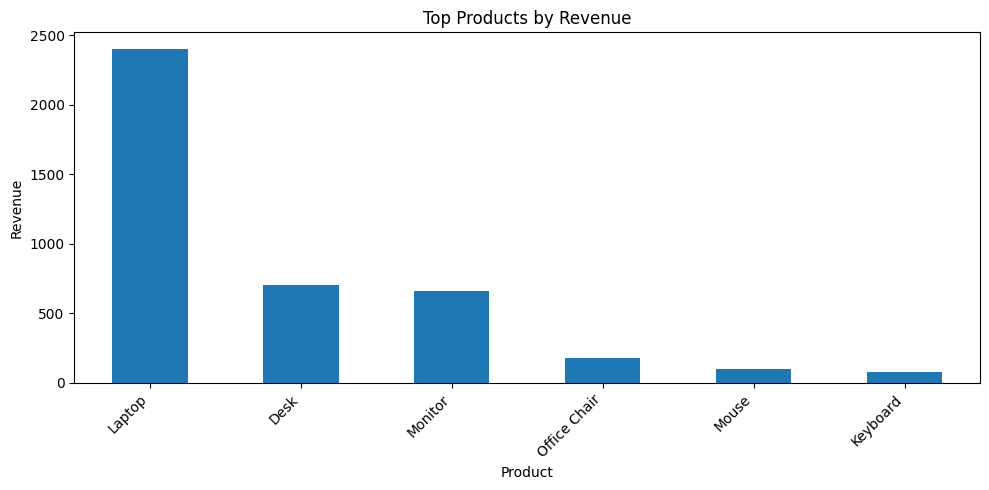

In [17]:
# Sales by Product
product_col = next((c for c in df.columns if c.lower() in ['product','productname','product_name']), None)
if product_col and rev_col:
    by_product = (df.groupby(product_col)[rev_col].sum().sort_values(ascending=False).head(10))
    display(by_product)
    plt.figure(figsize=(10,5))
    by_product.plot(kind='bar')
    plt.title('Top Products by Revenue')
    plt.xlabel('Product')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print('Skipping: could not find product and/or revenue column')

Category
Electronics    3060
Furniture       880
Accessories     180
Name: Revenue, dtype: int64

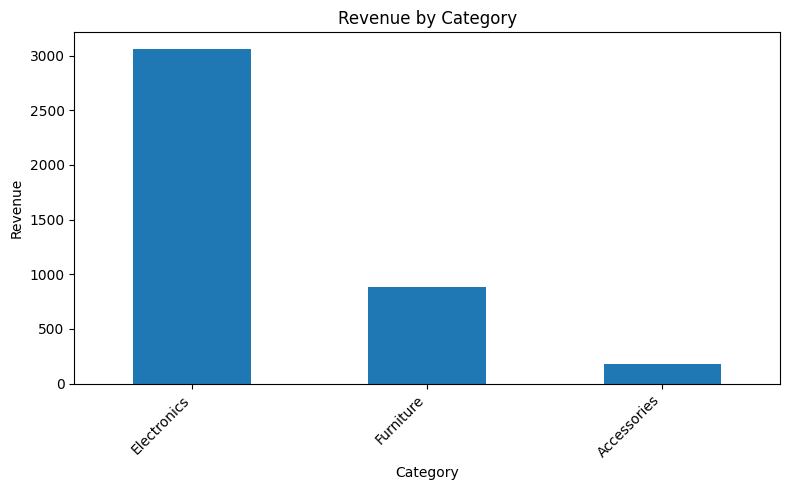

In [19]:
# Sales by Category
cat_col = next((c for c in df.columns if c.lower() in ['category','productcategory','product_category']), None)
if cat_col and rev_col:
    by_cat = df.groupby(cat_col)[rev_col].sum().sort_values(ascending=False)
    display(by_cat)
    plt.figure(figsize=(8,5))
    by_cat.plot(kind='bar')
    plt.title('Revenue by Category')
    plt.xlabel('Category')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print('Skipping: could not find category and/or revenue column')

YearMonth
2024-01    4120
Name: Revenue, dtype: int64

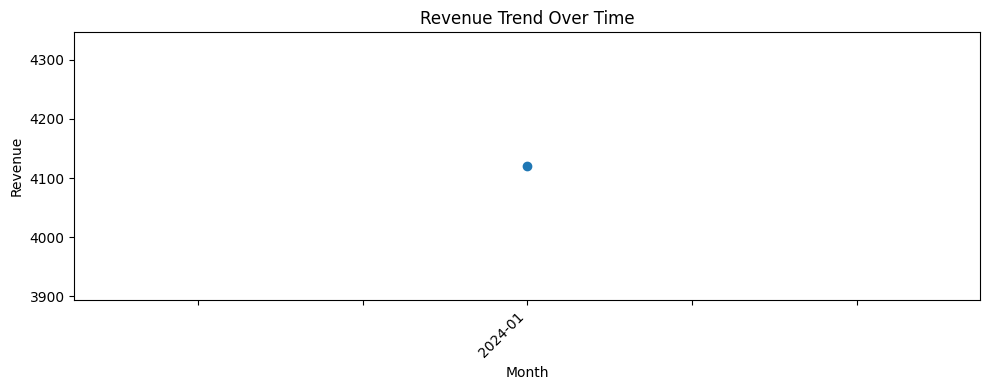

In [21]:
# Monthly Trend (if a date column exists)
date_col = next((c for c in df.columns if 'date' in c.lower()), None)
if date_col and rev_col:
    tmp = df.dropna(subset=[date_col]).copy()
    tmp['YearMonth'] = tmp[date_col].dt.to_period('M').astype(str)
    by_month = tmp.groupby('YearMonth')[rev_col].sum()
    display(by_month)
    plt.figure(figsize=(10,4))
    by_month.plot(kind='line', marker='o')
    plt.title('Revenue Trend Over Time')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print('Skipping: could not find a date column and/or revenue column')

In [23]:
out_path = '../data/cleaned_sales_data.csv'
df.to_csv(out_path, index=False)
print('✅ Saved:', out_path)

✅ Saved: ../data/cleaned_sales_data.csv


In [25]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       10 non-null     int64         
 1   OrderDate     10 non-null     datetime64[ns]
 2   CustomerName  10 non-null     object        
 3   Region        10 non-null     object        
 4   Product       10 non-null     object        
 5   Category      10 non-null     object        
 6   UnitPrice     10 non-null     int64         
 7   Quantity      10 non-null     int64         
 8   Revenue       10 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 852.0+ bytes


,OrderID,OrderDate,UnitPrice,Quantity,Revenue
count,10.00000,10,10.000000,10.000000,10.000000
mean,1005.50000,2024-01-14 04:48:00,381.000000,1.400000,412.000000
min,1001.00000,2024-01-05 00:00:00,25.000000,1.000000,25.000000
25%,1003.25000,2024-01-08 18:00:00,75.000000,1.000000,105.000000
50%,1005.50000,2024-01-13 12:00:00,220.000000,1.000000,285.000000
75%,1007.75000,2024-01-18 18:00:00,350.000000,1.750000,417.500000
max,1010.00000,2024-01-25 00:00:00,1200.000000,3.000000,1200.000000
std,3.02765,NaN,447.888875,0.699206,436.477058


In [27]:
df["Revenue"] = df["UnitPrice"] * df["Quantity"]
df.head()


,OrderID,OrderDate,CustomerName,Region,Product,Category,UnitPrice,Quantity,Revenue
0,1001,2024-01-05,John Smith,West,Laptop,Electronics,1200,1,1200
1,1002,2024-01-07,Sarah Davis,East,Desk,Furniture,350,1,350
2,1003,2024-01-08,Michael Lee,South,Monitor,Electronics,220,2,440
3,1004,2024-01-11,Emma Johnson,West,Office Chair,Furniture,180,1,180
4,1005,2024-01-12,Daniel Kim,North,Keyboard,Accessories,40,2,80


In [29]:
total_revenue = df["Revenue"].sum()
total_revenue


np.int64(4120)

In [31]:
import matplotlib.pyplot as plt


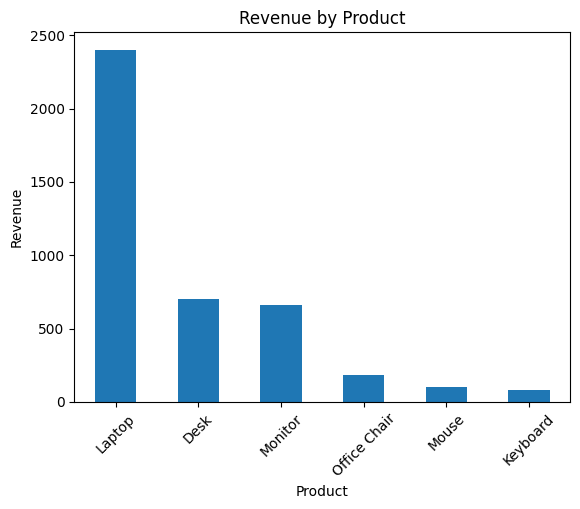

In [33]:
by_product = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

plt.figure()
by_product.plot(kind="bar")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


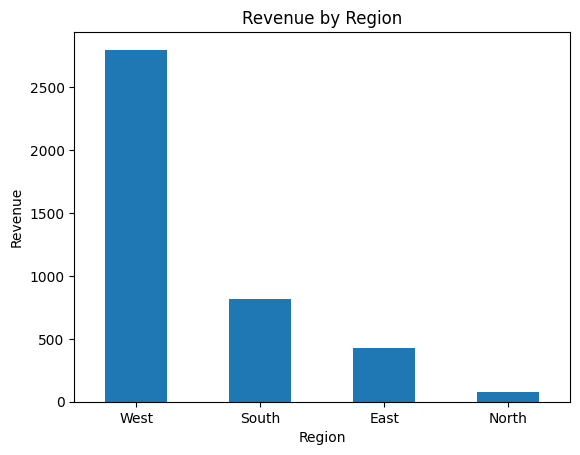

In [35]:
by_region = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)

plt.figure()
by_region.plot(kind="bar")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()


In [47]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"])


In [49]:
df.loc[5:, "OrderDate"] = pd.to_datetime([
    "2024-02-02",
    "2024-02-10",
    "2024-02-18",
    "2024-03-05",
    "2024-03-12"
])


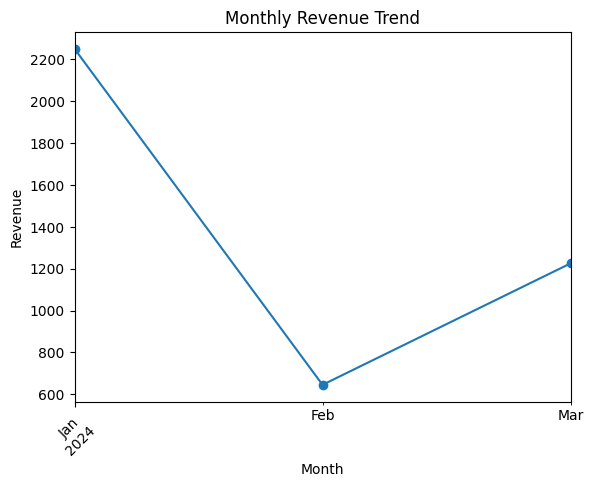

In [51]:
monthly_sales = df.groupby(df["OrderDate"].dt.to_period("M"))["Revenue"].sum()

plt.figure()
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


## Business Insights

This analysis shows revenue trends, top products, and regional performance.
